#  Linear Regression

## Geely Auto Assignment

### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car
3. Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the
   American Market.

#### Import Required Packages & Set Notebook Parameters

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# This library will be required for label encodings for car company name
from sklearn.preprocessing import LabelEncoder

# This will be used to get the dictionary mapping for the car company encodings done using LabelEncoder
from sklearn import preprocessing

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing STATS MODEL
import statsmodels.api as sm

# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# Ignore Warnings
warnings.filterwarnings('ignore')

OptionError: Pattern matched multiple keys

In [3]:
def plotHeatMap(data):
    plt.figure(figsize = (20, 26))
    plt.subplot(2, 1, 1)
    sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
    plt.show()

## Part 1
## Data Import & Preparation

In [4]:
# Import the data - read the csv file and view the data.

cars_df = pd.read_csv("CarPrice_Assignment.csv")
cars_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [5]:
cars_df.drop(labels = ['car_ID'], axis = 1, inplace = True)

#### Exploring the cars dataframe

In [6]:
cars_df.shape

(205, 25)

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

As part of the requirement for the prediction we need to consider only the company name - 
<b>There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building.</b>

In [8]:
# Extract the 'company name' and the 'car model' from the 'CarName' column & create new column for the same.
cars_df['CompanyName'] = cars_df['CarName'].str.split().str[0]

cars_df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000,audi
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000,audi
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000,audi
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000,audi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000,audi
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167,audi


In [9]:
# Rearranging the columns list in the dataframe to have the two new columns in 'Company Name' & 'Car Model' appear in 
cols = cars_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

# Assigning the re-arranged columns to our 'cars_df'
cars_df = cars_df[cols]
cars_df

,CompanyName,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,alfa-romero,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,alfa-romero,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,audi,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,audi,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,audi,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,audi,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,audi,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,audi,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,audi,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [10]:
# Now as we have extracted the Comapny Name from CarName, we would not need the car name columns for further analysis.
# Lets go ahead and drop the variable.

cars_df.drop('CarName', axis = 1, inplace = True)

# Lets look at the data again
cars_df.head()

C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\2330779521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df.drop('CarName', axis = 1, inplace = True)


,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Now lets see the values in the 'Company Name' column 

cars_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we see above there are company names which are same but with different spellings and some with abbreviations. Taking the values from the above list , lets create the corrected list and replace these values.

alfa-romero      -       Alfa Romeo <br>
maxda            -       Mazda <br>
nissan           -       Nissan <br>
porcshce         -       Porsche <br>
toyouta          -       Toyota <br>
vokswagen        -       Volkswagen <br>
vw               -       Volkswagen <br>


In [12]:
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['Nissan'], 'nissan')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['porcshce'], 'porsche')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['toyouta'], 'toyota')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

#Now lets look into the unique values in 'Comapny Name' again-
cars_df['CompanyName'].unique()

C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\1035396219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['CompanyName'] = cars_df['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\1035396219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['CompanyName'] = cars_df['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\1035396219.py:3: SettingWithCopyWarning: 
A value is trying to b

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
# A look at the summary of the numeric columns in the data.

cars_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Part 2

## Exploratpry Data Analysis & Data Visualization

Lets have a look at the Data Dictionary for the data set - 	

<b><u>Categorical Data</u></b>

| <b>Variable</b> | <b>Description</b> |    
| :-------- | :- | 
| Symboling | Its assigned insurance risk rating, A value of +3 indicates <br> that the auto is risky, -3 that it is                               probably prety safe. |
|Company Name | Name of car company. |
|Car Model	| Name of car model. |
|fueltype   | Car fuel type i.e gas or diesel. |
|aspiration	| Aspiration used in a car. |
|doornumber	| Number of doors in a car.|
|carbody    | Body of car. |
|drivewheel	| Type of drive wheel.|
|enginelocation|		Location of car engine.|
|enginetype	|		Type of engine.|
|cylindernumber	|	Cylinder placed in the car.|
|fuelsystem		|	Fuel system of car.|

<b><u>Numerical Data</u></b>

| <b>Variable</b> | <b>Description</b> |    
| :-------- |  :- | 
|Car_ID	|		    Unique id of each observation.|
|boreratio	|		Boreratio of car.|
|stroke	|		    Stroke or volume inside the engine.|
|compressionratio|	Compression ratio of car.|
|horsepower	|		Horsepower.|
|peakrpm |			    Car peak rpm.|
|citympg |			    Mileage in city.|
|highwaympg	|		Mileage on highway.|
|price    |			Price of car. ---> <b><u>Dependent variable</u></b>|
|wheelbase	|		Weelbase of car.|
|carlength	|		Length of car.|
|carwidth	|		Width of car.|
|carheight	|		Height of car.|
|curbweight	|		The weight of a car without occupants or baggage.|
|enginesize	|		Size of car.|



In [14]:
# Lets have a look at the price column

cars_df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

As we see from the above observation mean is greater than median (data is right skewed), we will go for median as our measure for central tendency whenever required.

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

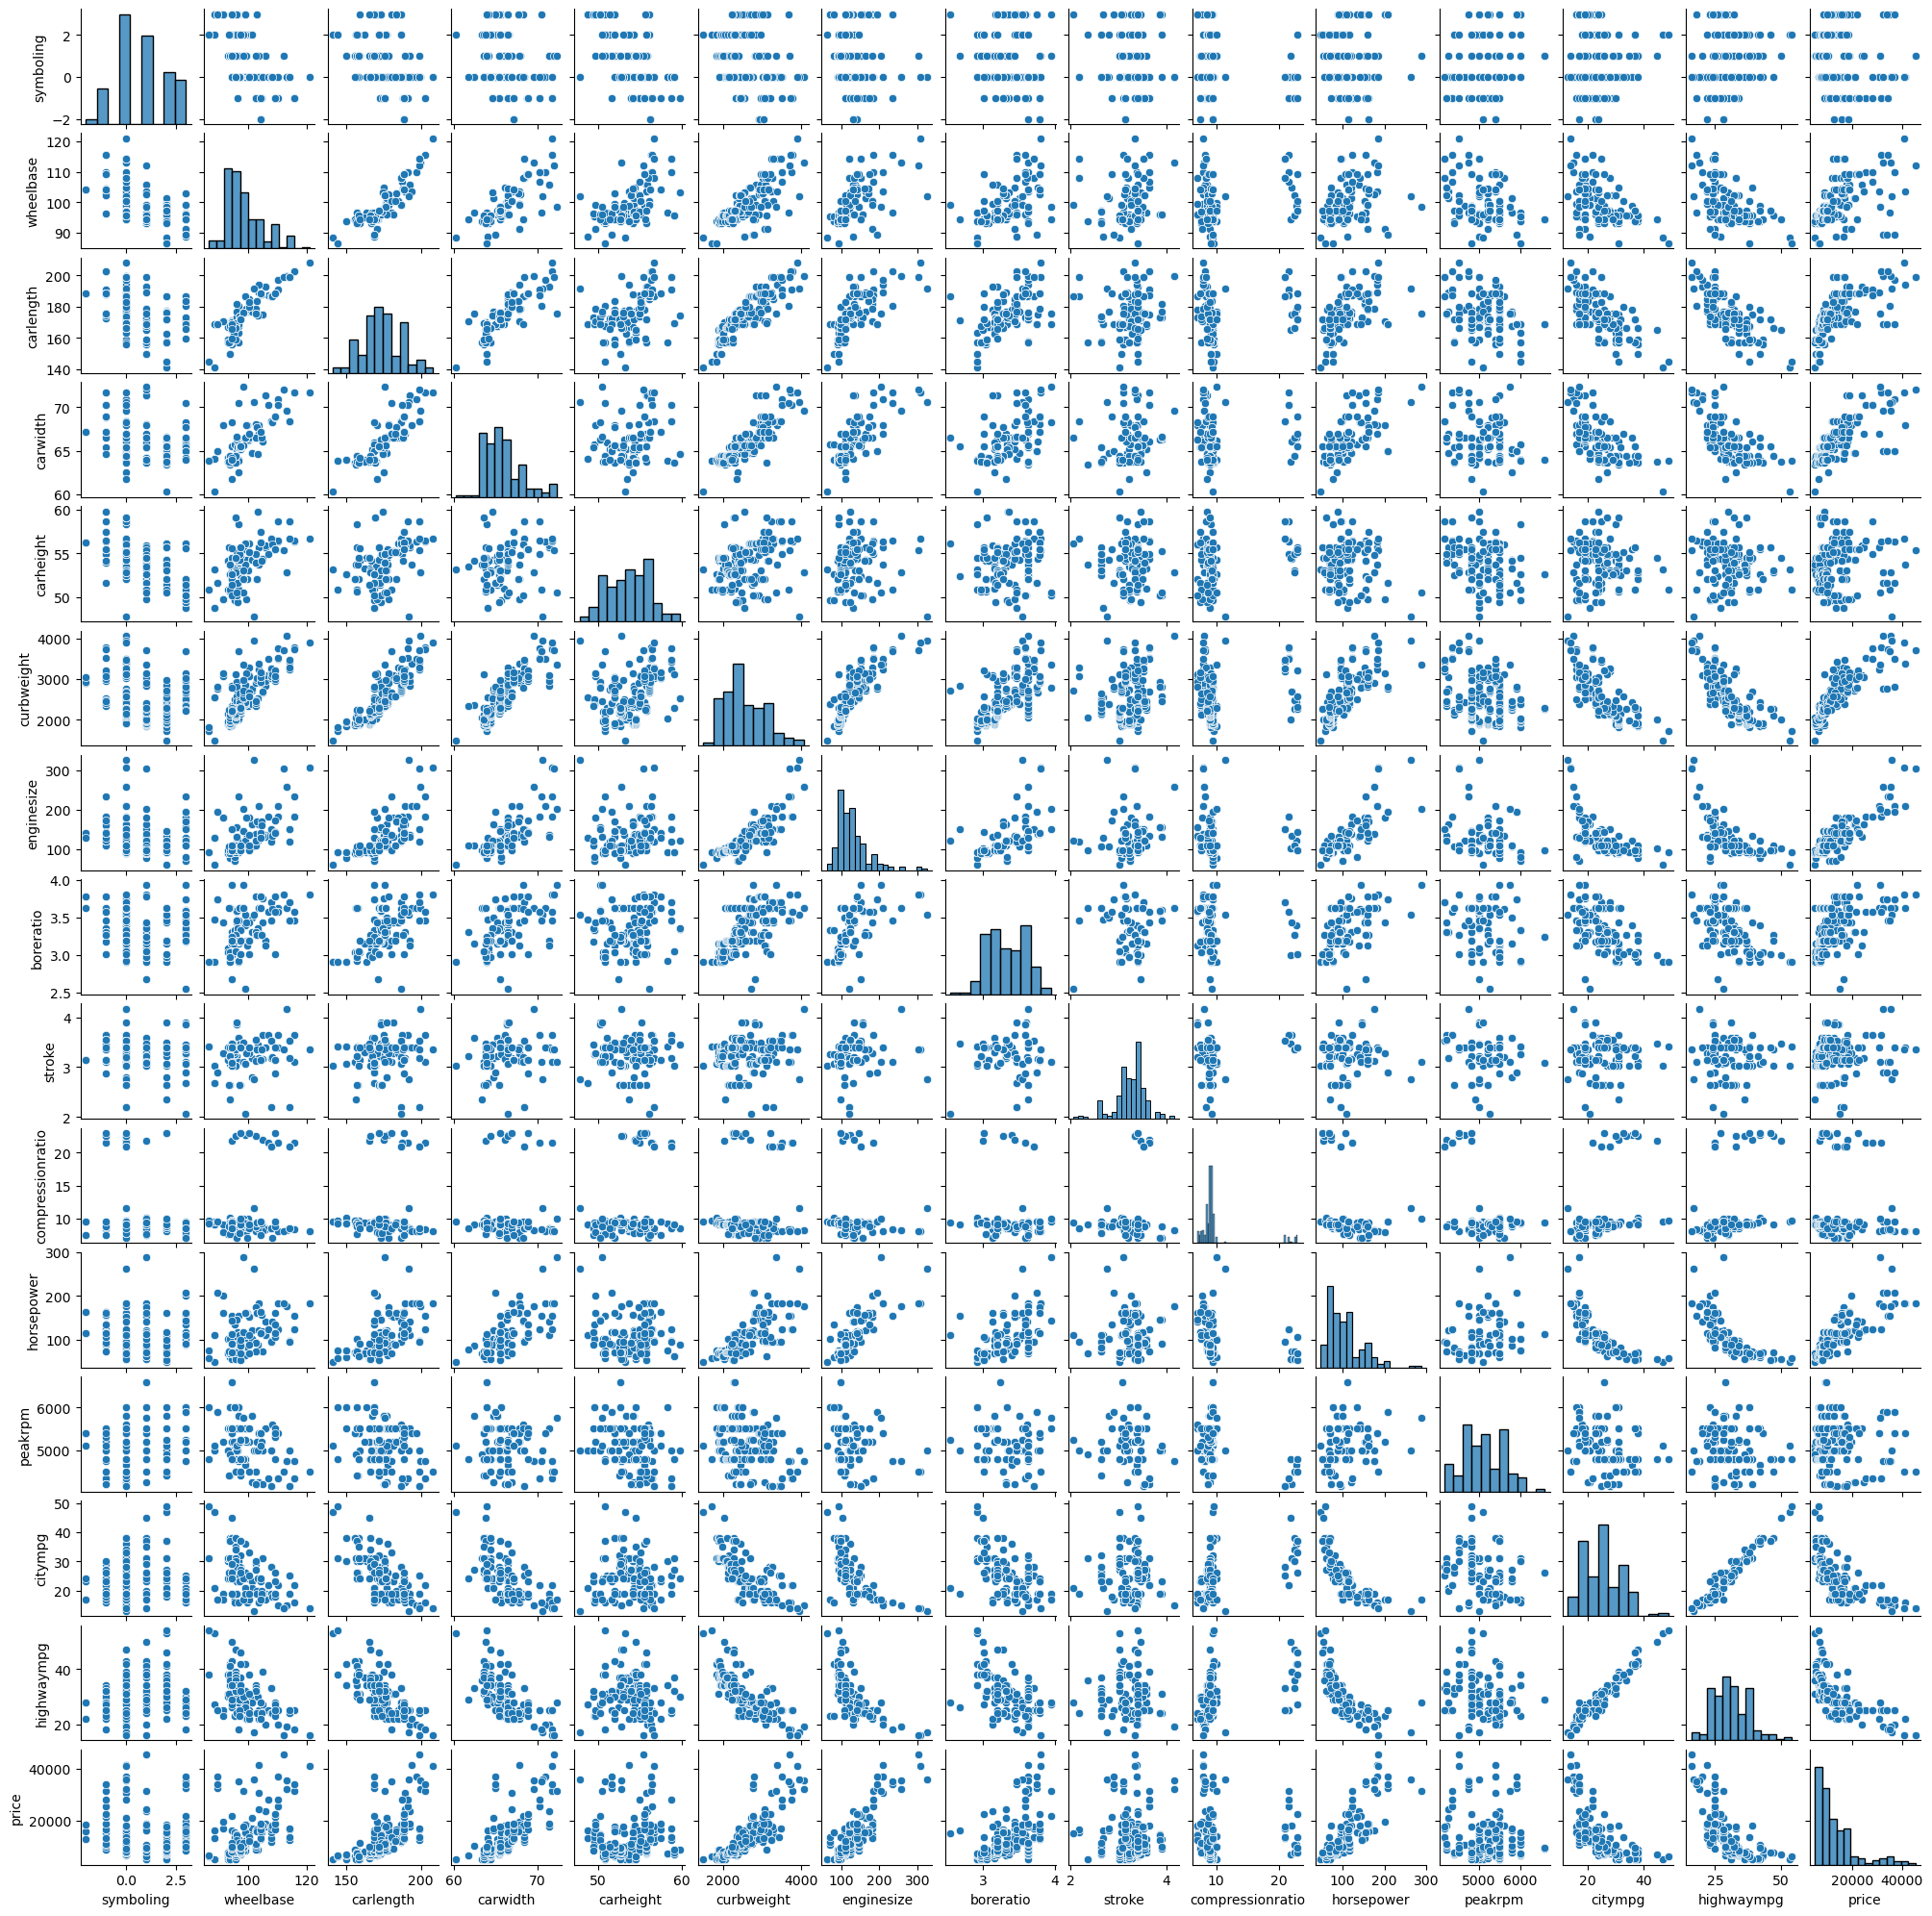

In [15]:
# Pair plot for the numeric variables showing how they fair against each other.

pairplot = sns.pairplot(cars_df)
pairplot.fig.set_size_inches(20,20)
plt.show()

C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\966202278.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_df.corr(), cmap="YlGnBu", annot = True)


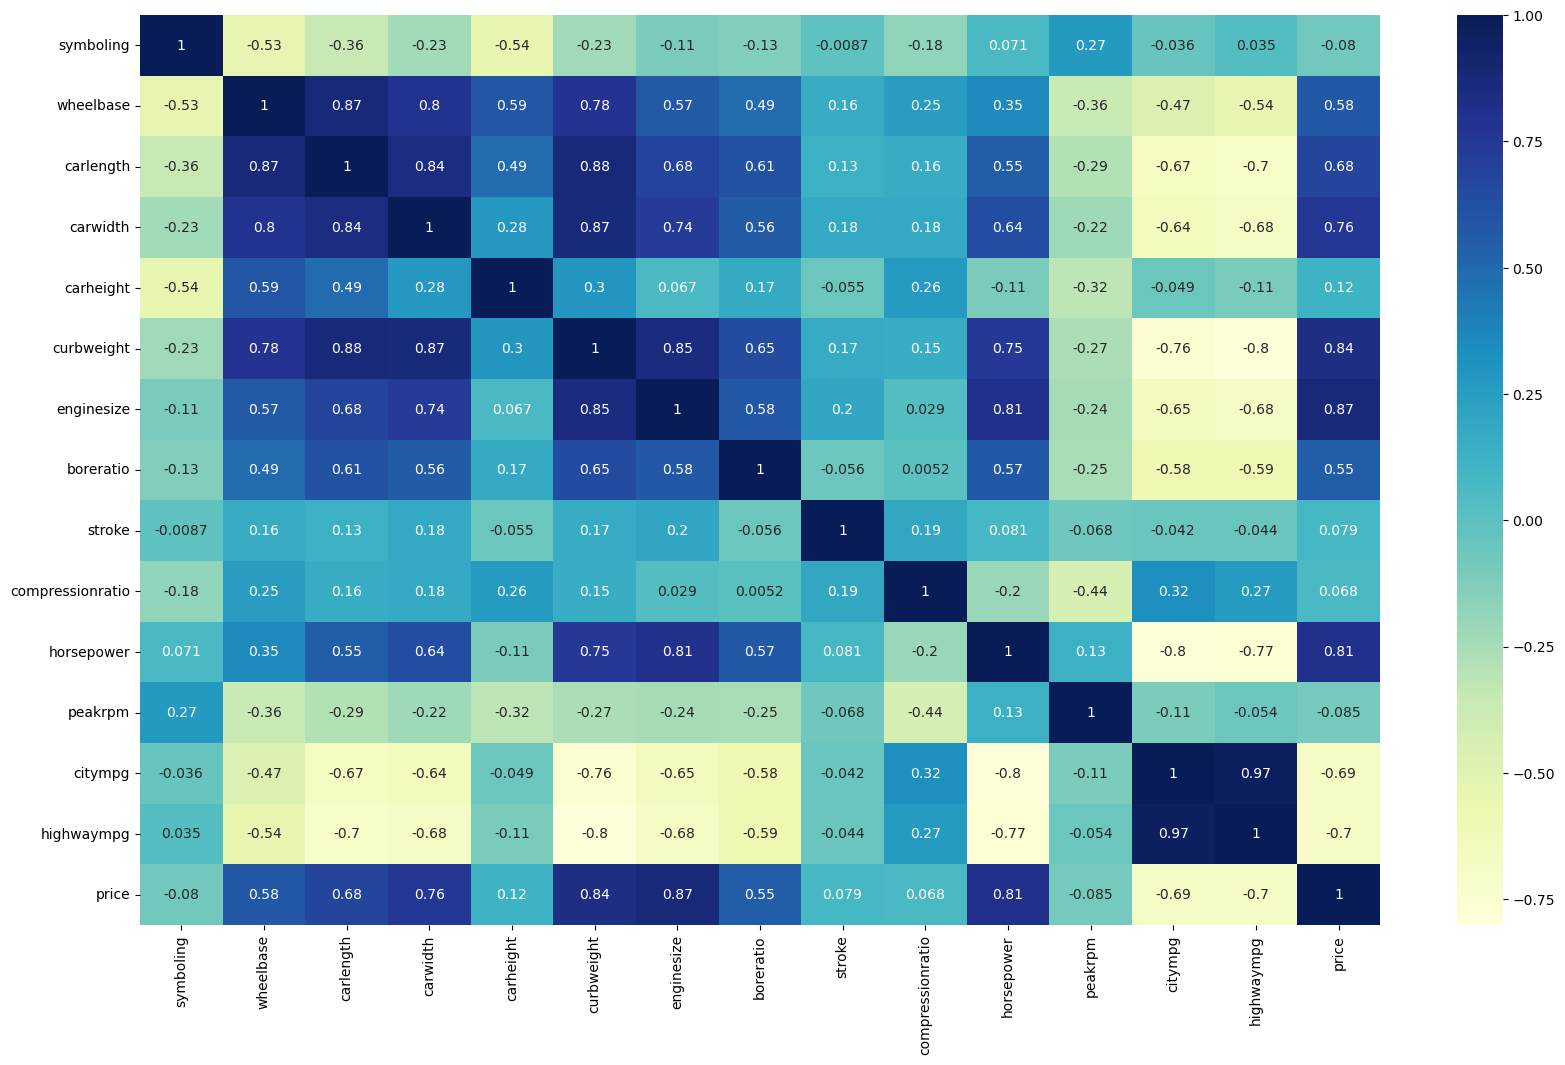

In [16]:
# Lets see the correlation plot among the numeric variables showing how strongly they are related 
# to each other and to 'price'.

plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(cars_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above correlation plot we see that there are some variables that are highly correlated while some have negative correlation values.

As we are predicting the price here, lets see how price correlates with the other variables - From the above plot we observe that
1. price is negatively correlated with symboling, peakrpm, citympg and highwaympg.
2. price has a very low correlation with carheight, stroke and compressionratio.
3. price shows a decent correlation with wheelbase, carlength, boreratio.
4. price is highly correlated to carwidth, crubweight, enginesize and horsepower.

### Categorical Data

From the data dictionary above let's observe the categorical variables


CompanyName
jaguar        35550.0
buick         32892.0
porsche       32528.0
bmw           22835.0
volvo         18420.0
audi          17710.0
peugeot       16630.0
mercury       16503.0
alfa-romeo    16500.0
saab          15275.0
mazda         10595.0
volkswagen     9737.5
renault        9595.0
toyota         9103.0
isuzu          8916.5
mitsubishi     8499.0
nissan         8124.0
subaru         7894.0
dodge          7609.0
plymouth       7609.0
honda          7295.0
chevrolet      6295.0
Name: price, dtype: float64
----------------------------------------------------------------------------------------------------------------


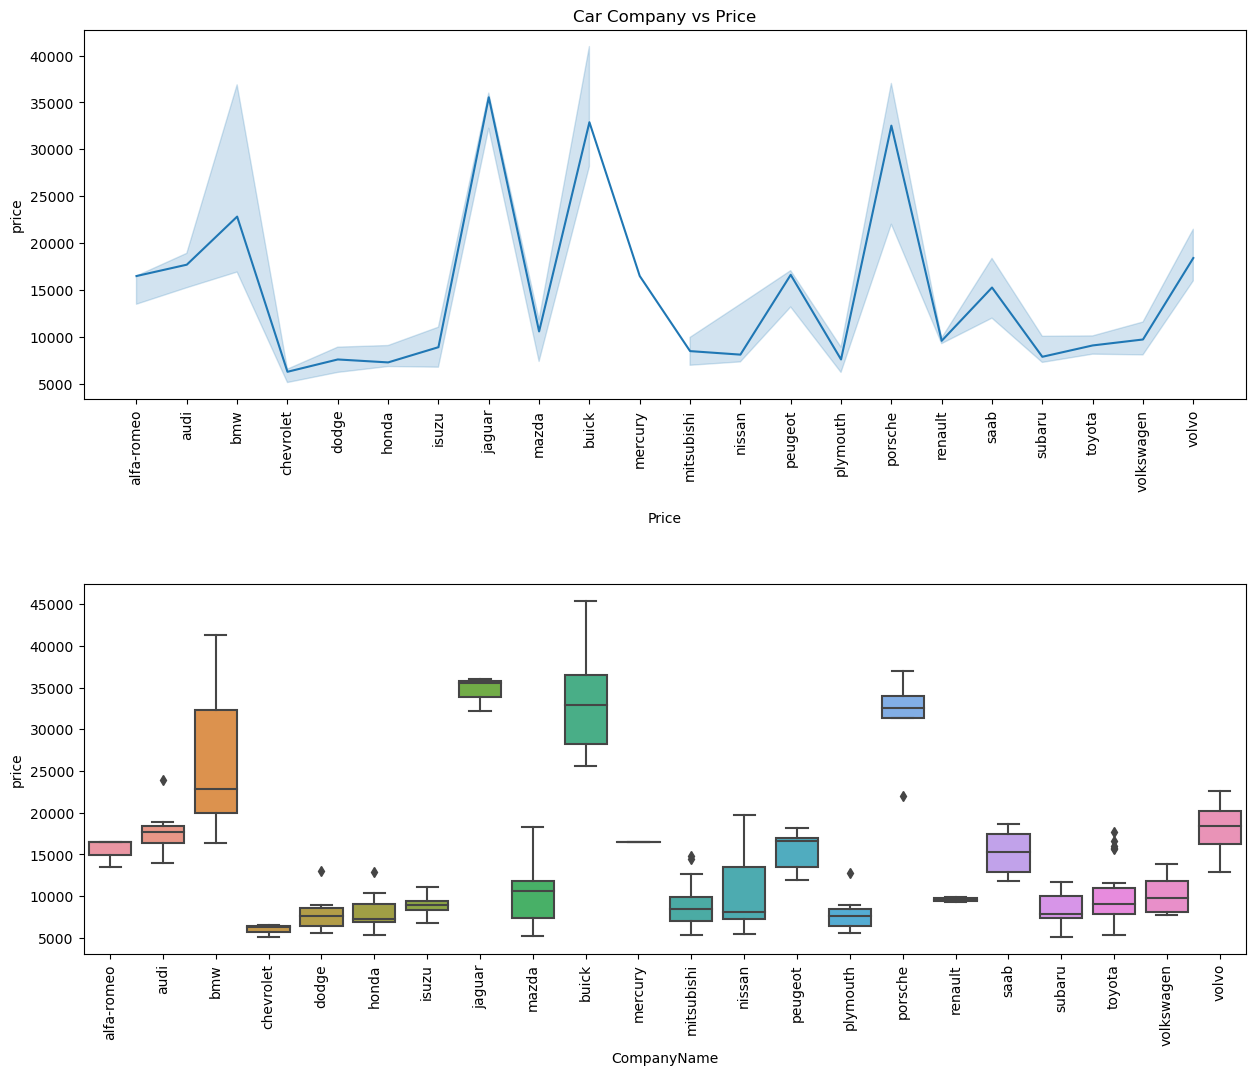

In [17]:
# Lets have a look at the Company Name vs Price distribution

print(cars_df.groupby(by='CompanyName').price.median().sort_values(ascending=False))
print('----------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.lineplot(x='CompanyName', y='price', data=cars_df, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Car Company vs Price')
plt.xlabel('Car Company', labelpad = 15)
plt.xlabel('Price', labelpad = 15)

plt.subplot(2, 1, 2)
sns.boxplot(x='CompanyName', y='price', data=cars_df)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.show()

Now lets see how the above categorical variables relate to the car price. We will see the box plots for each against the price.

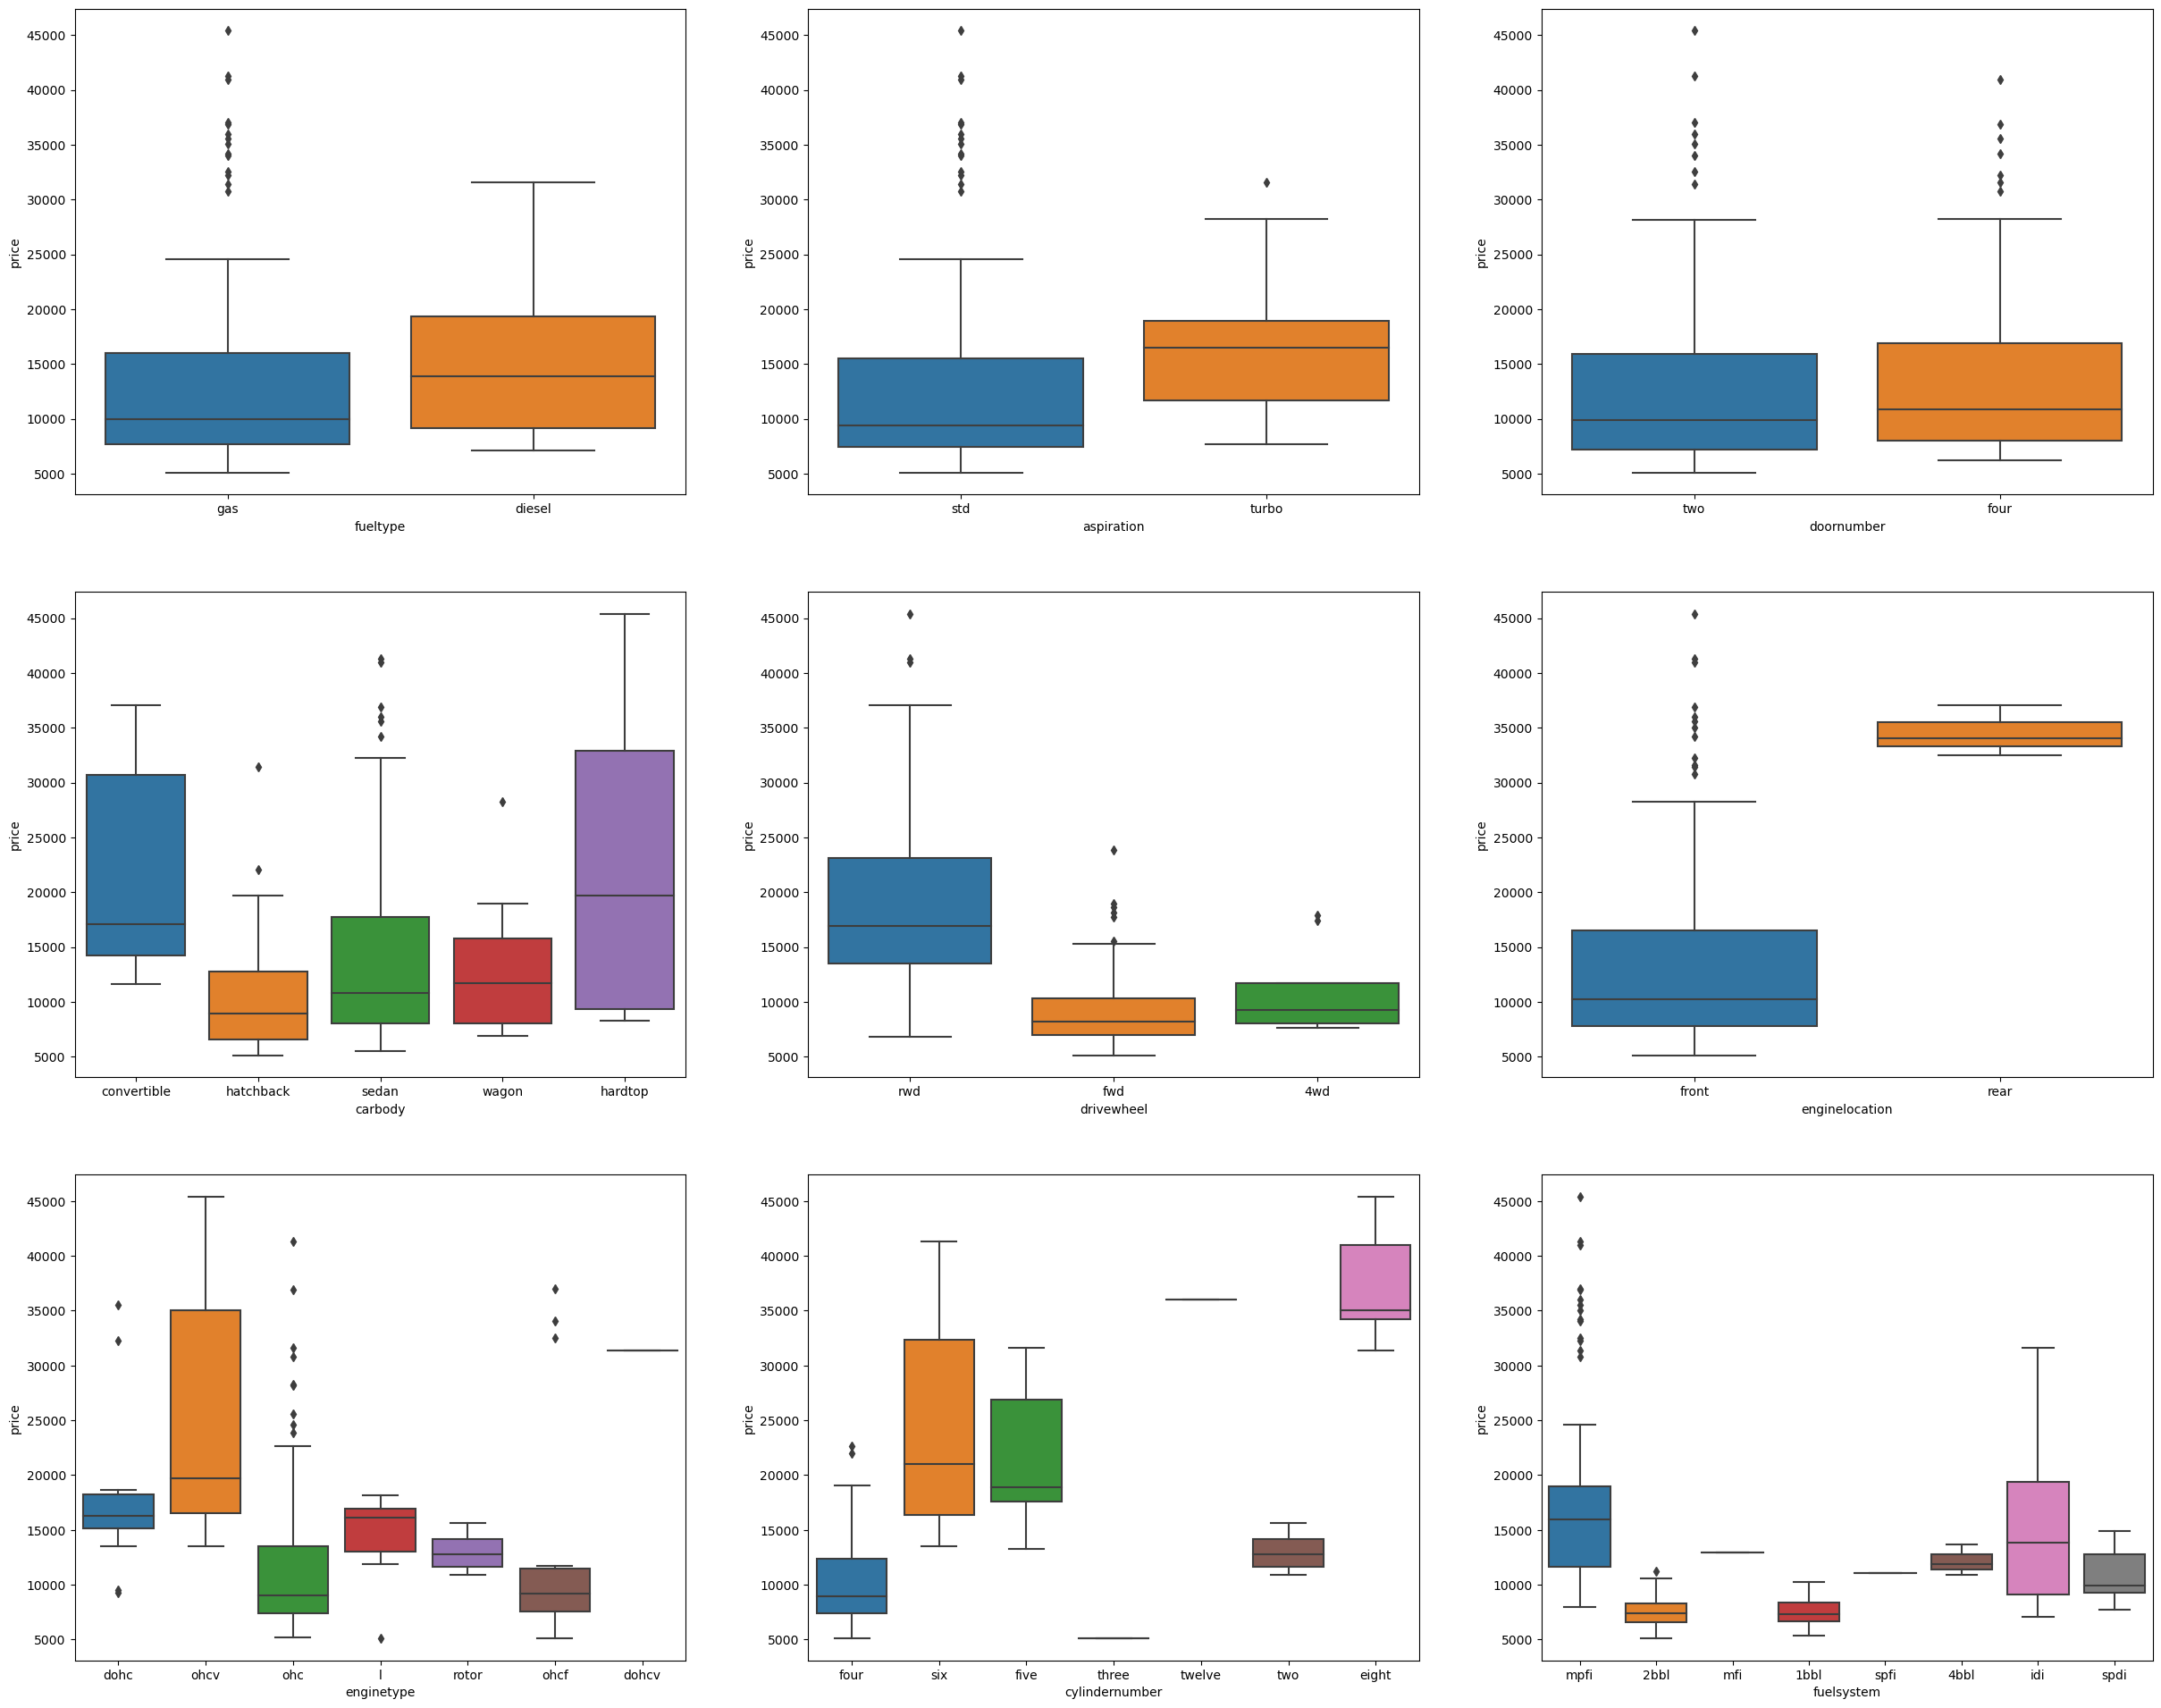

In [18]:
plt.figure(figsize=(30, 24))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = cars_df)

plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration', y = 'price', data = cars_df)

plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars_df)

plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_df)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_df)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_df)

plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_df)

plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_df)

plt.show()

## Data Preparation

### Dealing with Categorical Variables

#### Lets see the unique values associated with the below categorical variables - 

1. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem

#### This will aslo give us the idea for mapping the categorical values to 0, 1.



In [19]:
# unique values for fueltype
print("Unique values in fueltype")
print(cars_df['fueltype'].unique())

print('\n')

# unique values for aspiration
print("Unique values in aspiration")
print(cars_df['aspiration'].unique())

print('\n')

# unique values for doornumber
print("Unique values in doornumber")
print(cars_df['doornumber'].unique())

print('\n')

# unique values for carbody
print("Unique values in carbody")
print(cars_df['carbody'].unique())

print('\n')

# unique values for drivewheel
print("Unique values in drivewheel")
print(cars_df['drivewheel'].unique())

print('\n')

# unique values for enginelocation
print("Unique values in enginelocation")
print(cars_df['enginelocation'].unique())

print('\n')

# unique values for enginetype
print("Unique values in enginetype")
print(cars_df['enginetype'].unique())

print('\n')

# unique values for cylindernumber
print("Unique values in cylindernumber")
print(cars_df['cylindernumber'].unique())

print('\n')

# unique values for fuelsystem
print("Unique values in fuelsystem")
print(cars_df['fuelsystem'].unique())

Unique values in fueltype
['gas' 'diesel']


Unique values in aspiration
['std' 'turbo']


Unique values in doornumber
['two' 'four']


Unique values in carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Unique values in drivewheel
['rwd' 'fwd' '4wd']


Unique values in enginelocation
['front' 'rear']


Unique values in enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


Unique values in cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


Unique values in fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


As we see from the output above variables - 
1. [fueltype, aspiration, doornumber, enginelocation]              ---- 2 levels
2. [drivewheel]                                                    ---- 3 levels
3. [carbody]                                                       ---- 5 levels
4. [enginetype, cylindernumber]                                    ---- 7 levels
5. [fuelsystem]                                                    ---- 8 levels

Lets first consider assigning dummy variables for categorical variables with 2 and 3 levels respectively.

In [20]:
# We will map the variable with 2 levels to binary encodings of 0 & 1 - 'fueltype', 'aspiration', 'doornumber', 'enginelocation'

cars_df['fueltype'] = cars_df['fueltype'].map({'diesel':0, 'gas':1})
cars_df['aspiration'] = cars_df['aspiration'].map({'turbo':0, 'std':1})
cars_df['doornumber'] = cars_df['doornumber'].map({'two':0, 'four':1})
cars_df['enginelocation'] = cars_df['enginelocation'].map({'rear':0, 'front':1})


# Assigning dummy variables to ['drivewheel', 'carbody','enginetype', 'cylindernumber', 'fuelsystem'] columns

cars_df = pd.get_dummies(cars_df, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
cars_df.head()

C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\752636494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['fueltype'] = cars_df['fueltype'].map({'diesel':0, 'gas':1})
C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\752636494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['aspiration'] = cars_df['aspiration'].map({'turbo':0, 'std':1})
C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\752636494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,CompanyName,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,alfa-romeo,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,alfa-romeo,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,alfa-romeo,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,audi,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,audi,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
# Now as we did not use the default drop_first option in get_dummies above,
# lets go ahead and drop that dummy variabe which is leat related to price

# for carbody variable, from EDA - the category hatchback seems to be the least related to price.
# Lets go ahead and drop it

cars_df.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)

# for fuelsystem variable, from EDA - the category '1bbl' seems to be the least related to price.
# Lets go ahead and drop it
cars_df.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)

# the reason we are dropping 'drivewheel_4wd' from the drive wheel category 
# (though it looks like it is the most common preffered) is that it has a reducing effect on the price.
cars_df.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)

# engine type rotor category has the least effect on the price. Lets drop it.
cars_df.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)

# cylindernumber_three category has the least effect on the price. Lets drop it.
cars_df.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)

# Now lets again look at the shape of the dataset and the number of variables we have - 
print(cars_df.columns)
print(cars_df.shape)

Index(['CompanyName', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_convertible',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')
(205, 45)


After creation of dummy variables we have 45 variables in total.

Now lets see how can we normalize the company names

In [22]:
# Unique values in the 'Company Name' column 

cars_df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
# Lets have a look at certain range distributions for car price

cars_df.price.describe([.40, .80])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
40%       9036.600000
50%      10295.000000
80%      17493.800000
max      45400.000000
Name: price, dtype: float64

In [24]:
cars_df_category = cars_df.groupby(['CompanyName']).median()
cars_df_category['price']

CompanyName
alfa-romeo    16500.0
audi          17710.0
bmw           22835.0
buick         32892.0
chevrolet      6295.0
dodge          7609.0
honda          7295.0
isuzu          8916.5
jaguar        35550.0
mazda         10595.0
mercury       16503.0
mitsubishi     8499.0
nissan         8124.0
peugeot       16630.0
plymouth       7609.0
porsche       32528.0
renault        9595.0
saab          15275.0
subaru         7894.0
toyota         9103.0
volkswagen     9737.5
volvo         18420.0
Name: price, dtype: float64

In [25]:
CarLabels = ['EconomicCars', 'MidTierCars', 'LuxuryCars']
bins = [0, 10000, 20000, 50000]

cars_df_category = cars_df_category[['price']].join(pd.get_dummies(pd.cut(cars_df_category.price, bins, labels=CarLabels)))
cars_df_category

,price,EconomicCars,MidTierCars,LuxuryCars
CompanyName,,,,
alfa-romeo,16500.0,0,1,0
audi,17710.0,0,1,0
bmw,22835.0,0,0,1
buick,32892.0,0,0,1
chevrolet,6295.0,1,0,0
dodge,7609.0,1,0,0
honda,7295.0,1,0,0
isuzu,8916.5,1,0,0
jaguar,35550.0,0,0,1


In [26]:
# From the above grouping we have divided our car companies into 'EconomicCars', 'MidTierCars', 'LuxuryCars' categories.
# Lets integrate these categories into our main dataframe.

# Initially lets default the values to 0. We will only deal with 2 columns.

luxuryCars = ['bmw', 'buick', 'jaguar', 'porsche']


def mapCarCompanyToLuxuryCategory(carCompanies):
    val = 0
    if carCompanies in luxuryCars:
        val = 1
    else:
        val = 0
        
    return int(val)


cars_df['LuxuryCars'] = 0
cars_df['LuxuryCars'] = cars_df['CompanyName'].apply(mapCarCompanyToLuxuryCategory) 

In [27]:
midTierCars = ['alfa-romeo', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo']
def mapCarCompanyToMidTierCategory(carCompanies1):
    retval = 0
    if carCompanies1 in midTierCars:
        retval = 1
    else:
        retval = 0
    return int(retval)

cars_df['MidTierCars'] = 0
cars_df['MidTierCars'] = cars_df['CompanyName'].apply(mapCarCompanyToMidTierCategory) 

# Lets look at the dataframe again
cars_df.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,alfa-romeo,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,alfa-romeo,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,alfa-romeo,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,audi,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,audi,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [28]:
# Now as we have categorized the car companies into Economic, MidTies and Luxury cars,
# we can safely drop the 'CompanyName' column.

cars_df.drop(labels=['CompanyName'], axis = 1, inplace=True)
cars_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [29]:
# Dealing with the 'Symboling' variable -
# From the data dictionary we know - Its assigned insurance risk rating, A value of +3 indicates 
# that the auto is risky, -3 that it is probably prety safe.
# So this can be categorized into 3 categories such as - 'HighRisk' - (-3, -2), 'ModerateRisk' - (-1, 0, 1), 'LowRisk' - (2, 3)

SymbolingLabels = ['LowRisk', 'ModerateRisk', 'HighRisk']
bins = [-3, -2, 2, 3]

cars_df = cars_df.join(pd.get_dummies(pd.cut(cars_df['symboling'], bins, labels=SymbolingLabels)))
cars_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk,HighRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [30]:
# Now we can safely drop one of the risk based dummy variables created above. We will go ahead and drop the 'HighRisk'
# variable.

cars_df.drop(labels=['HighRisk'], axis = 1, inplace = True)
cars_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [31]:
# Now as we have categorized symboling into LowRisk, HighRisk and ModerateRisk categories, 
# we can safely drop the symboling column.

cars_df.drop(labels=['symboling'], axis = 1, inplace = True)
cars_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


### Dealing with Numerical Data

#### Removing Multicolinearity

<b>Form the correlation heatmap, we observe the following - </b>

    1. carlength is highly correlated with carwidth. (corr = 0.84)
    2. carlength is highly correlated with wheelbase. (corr = 0.87)
    3. carwidth is highly correlated with crubweight. (corr = 0.87)
    4. crubweight is highly correlated with horsepower. (corr = 0.75)
    5. horsepower is highly correlated with enginesize. (corr = 0.81)
    6. highwaympg is highly correlated with citympg. (corr = 0.97)

We have to reduce this multicolinearity among the variables to get an accurate model. We can safely drop some of these columns leaving the columns that is strongly correlated to 'price'.

We will be dropping columns ['carwidth', 'carlength', 'highwaympg', 'citympg']. The reason for dropping 'carwidth', 'carlength' is that these two variables are strongly correlated to 'curbweight'. But as 'curbweight' is more highly correlated to price, we will keep it and drop 'carwidth', 'carlength'.

The reason for dropping 'highwaympg', 'citympg' is that they both are very highly correlated to each other but have a very low correlation with price.

We will keep the other variables for time being as they show a very strong correlation with price.

In [32]:
cars_df.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)

# lets have a look at the final data before proceeding with the model building.
cars_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


## Part 3


### Building the linear model

#### User Defined Functions

    1. applyStatsModel   -     Applies the StatsModel to the given data.
    2. calculateVIF      -     Calculates the VIF for a given model.

In [33]:
# ***************************************************************************************
# Purpose     :    Applies stats model to the given data & returns the built 'linear_model'.
# Parameters  :    data - the dataset on which the linear model has to be built on.
# Returns     :    linear_model - the model that has been built on the data provided. 
# ***************************************************************************************

def applyStatsModel(data):
    # Adding a constant variable 
    X_train_linear_model = sm.add_constant(data)
    
    # Run the linear model
    linear_model = sm.OLS(y_train, X_train_linear_model).fit() 
    
    return linear_model


# *****************************************************************************************************
# Purpose     :    Calculates the Variance inflation factor for the given data on which stats model has been applied.
# Parameters  :    data - the dataset for which the VIF values have to be calculated.
# Returns     :    vif - the vif values for the variables on the model's data.
# *****************************************************************************************************

def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


### Split the data into Train and Test sets

In [34]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# We will divide the data into 70/30 % to train and test data respectively.
df_train, df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
#  Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# 'wheelbase' 'carheight' 'curbweight' 'enginesize' 'boreratio' 'stroke' 'compressionratio' 
# 'horsepower' 'peakrpm' 'curbweight' 'price'

scaler = MinMaxScaler()

num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
y_train = df_train.pop('price')
X_train = df_train

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with 15 output variables.
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 3),
 ('aspiration', False, 5),
 ('doornumber', False, 19),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('drivewheel_fwd', False, 12),
 ('drivewheel_rwd', False, 13),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 10),
 ('carbody_sedan', False, 14),
 ('carbody_wagon', False, 20),
 ('enginetype_dohc', False, 15),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 9),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 6),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 16),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', False, 11),

In [40]:
# Lets see the columns that RFE supports - 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'carbody_convertible', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'LuxuryCars', 'MidTierCars', 'LowRisk'],
      dtype='object')

In [41]:
# Lets see the variables the are rejected by RFE - 
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'drivewheel_fwd',
       'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohcv',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'ModerateRisk'],
      dtype='object')

### Lets now build our model using statsmodel, to get the detailed statistics

### Model 1

We will build our first model using the variables that rfe supported above.

In [42]:
# Lets now create a data set only with RFE supported columns.
X_train_1 = X_train[col]

# Run the linear model
stats_model_1 = applyStatsModel(X_train_1)

#Let's see the summary of the linear model built above
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           5.61e-71
Time:                        15:00:37   Log-Likelihood:                 238.12
No. Observations:                 143   AIC:                            -432.2
Df Residuals:                     121   BIC:                            -367.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [43]:
# Calculate the VIFs again for the new model
vif_val_1 = calculateVIF(X_train_1)

# Let's see the vif values
vif_val_1

,Features,VIF
3,enginesize,184.16
0,enginelocation,101.78
2,curbweight,77.69
4,boreratio,66.17
15,cylindernumber_four,65.18
5,stroke,60.83
7,horsepower,39.73
16,cylindernumber_six,35.87
1,wheelbase,28.63
11,enginetype_ohc,15.94


Lets see the correlation heat map for Model 1

### Model 2

Looking at the statistics of model 1, we observe that variable - <b>cylindernumber_eight</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [44]:
X_train_2 = X_train_1.drop(["cylindernumber_eight"], axis = 1)

# Run the linear model
stats_model_2 = applyStatsModel(X_train_2)

#Let's see the summary of the new linear model
print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     120.9
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.54e-70
Time:                        15:00:43   Log-Likelihood:                 234.04
No. Observations:                 143   AIC:                            -426.1
Df Residuals:                     122   BIC:                            -363.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.03

In [45]:
# Calculate the VIFs again for the new model
vif_val_2 = calculateVIF(X_train_2)

# Let's see the vif values
vif_val_2

,Features,VIF
2,curbweight,76.82
3,enginesize,57.46
0,enginelocation,52.90
7,horsepower,39.36
5,stroke,35.74
4,boreratio,31.49
14,cylindernumber_four,28.71
1,wheelbase,28.53
11,enginetype_ohc,13.68
8,peakrpm,10.55


### Model 3

Looking at the statistics of model 2, we observe that variable - <b>enginesize</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [46]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Run the linear model
stats_model_3 = applyStatsModel(X_train_3)

#Let's see the summary of the new linear model
print(stats_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.49e-69
Time:                        15:00:50   Log-Likelihood:                 227.92
No. Observations:                 143   AIC:                            -415.8
Df Residuals:                     123   BIC:                            -356.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [47]:
# Calculate the VIFs again for the new model
vif_val_3 = calculateVIF(X_train_3)

# Let's see the vif values
vif_val_3

,Features,VIF
2,curbweight,71.28
0,enginelocation,51.48
6,horsepower,37.41
3,boreratio,30.14
4,stroke,28.78
1,wheelbase,28.10
13,cylindernumber_four,27.77
10,enginetype_ohc,13.53
7,peakrpm,9.28
14,cylindernumber_six,5.63


### Model 4

Looking at the statistics of model 3, we observe that variable - <b>stroke</b> has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [48]:
X_train_4 = X_train_3.drop(["stroke"], axis = 1)

# Run the linear model
stats_model_4 = applyStatsModel(X_train_4)

#Let's see the summary of the new linear model
print(stats_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.76e-70
Time:                        15:00:55   Log-Likelihood:                 227.30
No. Observations:                 143   AIC:                            -416.6
Df Residuals:                     124   BIC:                            -360.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [49]:
# Calculate the VIFs again for the new model
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4

,Features,VIF
2,curbweight,70.62
0,enginelocation,43.35
5,horsepower,35.54
3,boreratio,30.13
1,wheelbase,28.04
12,cylindernumber_four,27.75
9,enginetype_ohc,12.43
6,peakrpm,9.25
13,cylindernumber_six,5.61
11,cylindernumber_five,4.08


### Model 5

Looking at the statistics of model 4, we observe that variable - <b>boreratio</b> has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [50]:
X_train_5 = X_train_4.drop(["boreratio"], axis = 1)

# Run the linear model
stats_model_5 = applyStatsModel(X_train_5)

#Let's see the summary of the new linear model
print(stats_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.84e-71
Time:                        15:00:57   Log-Likelihood:                 227.09
No. Observations:                 143   AIC:                            -418.2
Df Residuals:                     125   BIC:                            -364.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [51]:
# Calculate the VIFs again for the new model
vif_val_5 = calculateVIF(X_train_5)

# Let's see the vif values
vif_val_5

,Features,VIF
2,curbweight,68.91
0,enginelocation,41.46
4,horsepower,30.86
1,wheelbase,27.94
11,cylindernumber_four,26.60
8,enginetype_ohc,12.36
5,peakrpm,8.84
12,cylindernumber_six,5.24
10,cylindernumber_five,4.00
14,LuxuryCars,3.11


### Model 6

Looking at the statistics of model 5, we observe that variable - <b>cylindernumber_twelve</b> has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [52]:
X_train_6 = X_train_5.drop(["cylindernumber_twelve"], axis = 1)

# Run the linear model
stats_model_6 = applyStatsModel(X_train_6)

#Let's see the summary of the new linear model
print(stats_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           5.08e-72
Time:                        15:00:58   Log-Likelihood:                 226.55
No. Observations:                 143   AIC:                            -419.1
Df Residuals:                     126   BIC:                            -368.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0318    

In [53]:
# Calculate the VIFs again for the new model
vif_val_6 = calculateVIF(X_train_6)

# Let's see the vif values
vif_val_6

,Features,VIF
2,curbweight,67.16
0,enginelocation,39.95
1,wheelbase,27.94
11,cylindernumber_four,25.55
4,horsepower,24.68
8,enginetype_ohc,12.36
5,peakrpm,8.42
12,cylindernumber_six,4.12
10,cylindernumber_five,3.78
13,LuxuryCars,3.10


### Model 7

Looking at the statistics of model 6, we observe that variable - <b>cylindernumber_six</b> has a high p-value and thus is insignificant for our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [54]:
X_train_7 = X_train_6.drop(["cylindernumber_six"], axis = 1)

# Run the linear model
stats_model_7 = applyStatsModel(X_train_7)

#Let's see the summary of the new linear model
print(stats_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           1.35e-72
Time:                        15:01:00   Log-Likelihood:                 225.19
No. Observations:                 143   AIC:                            -418.4
Df Residuals:                     127   BIC:                            -371.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0061    

In [55]:
# Calculate the VIFs again for the new model
vif_val_7 = calculateVIF(X_train_7)

# Let's see the vif values
vif_val_7

,Features,VIF
2,curbweight,67.16
0,enginelocation,37.69
1,wheelbase,27.15
4,horsepower,23.37
11,cylindernumber_four,13.38
8,enginetype_ohc,10.66
5,peakrpm,8.39
12,LuxuryCars,2.91
3,compressionratio,2.56
10,cylindernumber_five,2.27


### Model 8

Looking at the statistics of model 7, we observe that variables enginetype_dohcv & curbweight have almost similar p-values of 0.55 and 0,57 respectively. Now after trials, runs and tests by dropping either of them on the next model, it was observed that if we drop curbweight at this point , it considerably reduces the R-squared and Adj. R-squared values. Also curbweight has a higher correlation to price. So we will drop the <b>enginetype_dohcv</b> column here.

In [56]:
X_train_8 = X_train_7.drop(["enginetype_dohcv"], axis = 1)

# Run the linear model
stats_model_8 = applyStatsModel(X_train_8)

#Let's see the summary of the new linear model
print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     155.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           4.67e-73
Time:                        15:01:01   Log-Likelihood:                 223.52
No. Observations:                 143   AIC:                            -417.0
Df Residuals:                     128   BIC:                            -372.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0210    

In [57]:
# Calculate the VIFs again for the new model
vif_val_8 = calculateVIF(X_train_8)

# Let's see the vif values
vif_val_8

,Features,VIF
2,curbweight,58.86
0,enginelocation,37.52
1,wheelbase,26.94
4,horsepower,18.02
10,cylindernumber_four,12.87
7,enginetype_ohc,10.27
5,peakrpm,8.22
11,LuxuryCars,2.83
3,compressionratio,2.45
9,cylindernumber_five,2.23


### Model 9

Looking at the statistics of model 8, we observe that variable - <b>compressionratio</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [58]:
X_train_9 = X_train_8.drop(["compressionratio"], axis = 1)

# Run the linear model
stats_model_9 = applyStatsModel(X_train_9)

#Let's see the summary of the new linear model
print(stats_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     159.5
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           9.52e-73
Time:                        15:01:02   Log-Likelihood:                 219.84
No. Observations:                 143   AIC:                            -411.7
Df Residuals:                     129   BIC:                            -370.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0746    

In [59]:
# Calculate the VIFs again for the new model
vif_val_9 = calculateVIF(X_train_9)

# Let's see the vif values
vif_val_9

,Features,VIF
2,curbweight,56.19
0,enginelocation,36.49
1,wheelbase,26.83
3,horsepower,16.64
9,cylindernumber_four,12.81
6,enginetype_ohc,10.25
4,peakrpm,7.91
10,LuxuryCars,2.79
8,cylindernumber_five,2.21
7,enginetype_ohcf,2.10


### Model 10

From the stats model summary of model 9, we see that all the p-values are now in the allowed range. We will look into the VIF table now. From the VIF table above we see that <b>curbweight</b> has a very high vif value. Lets drop it and re-bilud our model.

In [60]:
X_train_10 = X_train_9.drop(["curbweight"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_10)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.1
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           8.54e-70
Time:                        15:01:03   Log-Likelihood:                 209.45
No. Observations:                 143   AIC:                            -392.9
Df Residuals:                     130   BIC:                            -354.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1316    

In [61]:
X_train_10.columns

Index(['enginelocation', 'wheelbase', 'horsepower', 'peakrpm',
       'carbody_convertible', 'enginetype_ohc', 'enginetype_ohcf',
       'cylindernumber_five', 'cylindernumber_four', 'LuxuryCars',
       'MidTierCars', 'LowRisk'],
      dtype='object')

In [62]:
# Calculate the VIFs again for the new model
vif_val_10 = calculateVIF(X_train_10)

# Let's see the vif values
vif_val_10

,Features,VIF
0,enginelocation,33.32
8,cylindernumber_four,12.76
1,wheelbase,12.10
5,enginetype_ohc,9.95
2,horsepower,7.08
3,peakrpm,6.71
9,LuxuryCars,2.74
7,cylindernumber_five,2.14
10,MidTierCars,2.08
6,enginetype_ohcf,2.07


### Model 11

From the stats model summary of model 10, we see that all the p-values are now in the allowed range. We will look into the VIF table now. From the VIF table above we see that <b>enginelocation</b> has a high vif value. Lets drop it and re-bilud our model.

In [63]:
X_train_11 = X_train_10.drop(["enginelocation"], axis = 1)

# Run the linear model
X_train_linear_model = sm.add_constant(X_train_11)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 

#Let's see the summary of the new linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           3.63e-69
Time:                        15:01:04   Log-Likelihood:                 205.04
No. Observations:                 143   AIC:                            -386.1
Df Residuals:                     131   BIC:                            -350.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0678    

In [64]:
# Calculate the VIFs again for the new model
vif_val_11 = calculateVIF(X_train_11)

# Let's see the vif values
vif_val_11

,Features,VIF
7,cylindernumber_four,11.64
4,enginetype_ohc,8.37
0,wheelbase,7.54
1,horsepower,6.37
2,peakrpm,5.36
8,LuxuryCars,2.65
6,cylindernumber_five,2.13
9,MidTierCars,2.08
5,enginetype_ohcf,1.92
3,carbody_convertible,1.25


## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [65]:
X_train_linear_model.columns

Index(['const', 'wheelbase', 'horsepower', 'peakrpm', 'carbody_convertible',
       'enginetype_ohc', 'enginetype_ohcf', 'cylindernumber_five',
       'cylindernumber_four', 'LuxuryCars', 'MidTierCars', 'LowRisk'],
      dtype='object')

In [66]:
y_train_price = linear_model.predict(X_train_linear_model)

C:\Users\aadit\AppData\Local\Temp\ipykernel_21352\2089857793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

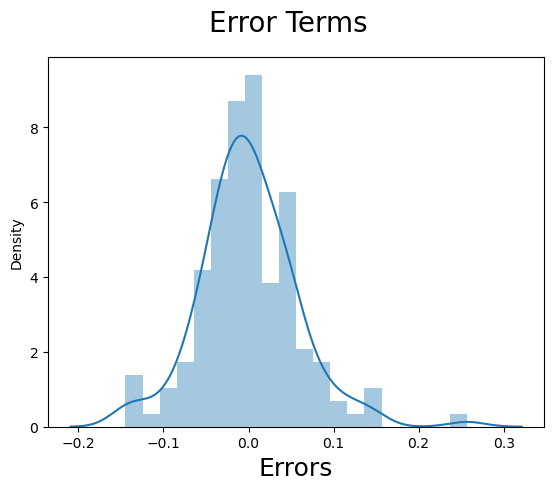

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [68]:
num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [69]:
y_test = df_test.pop('price')
X_test = df_test

In [70]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_11.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making predictions
y_pred = linear_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

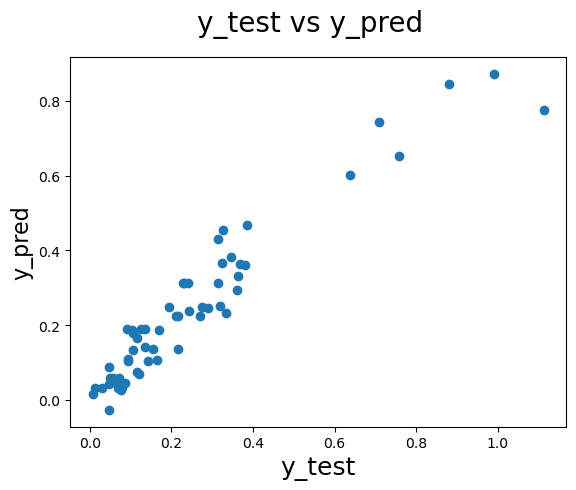

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Part 4

## Conclusion

From the final model we have all our variables in the permissible limits and the model looks to be stable. The error terms are also normally distributed. Overall the model looks good.

Our deciding factors would be -

    1. wheelbase	
    2. horsepower	
    3. cylindernumber_four
    4. LuxuryCars
    5. carbody_convertible

The final equation of the for our best fitted line for predicting price would be -

<b> price = (0.3249 x wheelbase) + (0.4945 x horsepower) + (-0.0623 x cylindernumber_four) + (0.2580 x LuxuryCars) + (0.1835 x carbody_convertible) - 0.0163 </b>